In [19]:
import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
set_config(transform_output="pandas")

In [10]:
#load in our data
penguins = pd.read_csv("01_materials/notebooks/dataset/penguins.csv")
penguins

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190
...,...,...
337,55.8,207
338,43.5,202
339,49.6,193
340,50.8,210


In [11]:
min_max_values = penguins.agg(['min','max'])
min_max_values

,bill_length_mm,flipper_length_mm
min,32.1,172
max,59.6,231


In [23]:
penguins_copy = penguins.copy()

In [24]:
scaler = StandardScaler()
standardized_penguins = scaler.fit_transform(penguins_copy)

    k        wssd
0   1  684.000000
1   2  247.016625
2   3  157.815322
3   4  118.770529
4   5   91.476109
5   6   78.647398
6   7   73.619352
7   8   57.793880
8   9   53.405565
9  10   49.201204


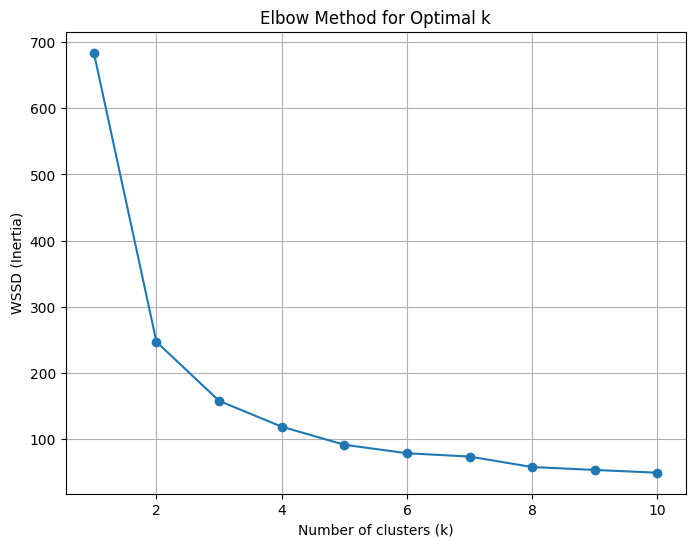

In [25]:
import matplotlib.pyplot as plt

# Initialize a list to store results
results = []

# Loop through values of k from 1 to 10
for k in range(1, 11):
    # Initialize K-means clustering model
    elbow_kmeans = KMeans(n_clusters=k, random_state=0, init="k-means++")
    # Fit the initialized model to our data
    elbow_kmeans.fit(standardized_penguins)
    # Append the k and WSSD (inertia) values to the results list
    results.append({"k": k, "wssd": elbow_kmeans.inertia_})

# Convert the results list into a DataFrame
penguin_clust_ks = pd.DataFrame(results)

# Display the DataFrame
print(penguin_clust_ks)

# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(penguin_clust_ks['k'], penguin_clust_ks['wssd'], marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSSD (Inertia)")
plt.grid(True)
plt.show()

In [26]:
penguin_clust_ks = pd.DataFrame(columns = ["k","wssd"])
for k in range(1,11):
    elbow_kmeans = KMeans(n_clusters=k, random_state=123, n_init=10) #initalize our model with the value of k
    elbow_kmeans.fit(standardized_penguins) #fit model to our data
    penguin_clust_ks = pd.concat([ penguin_clust_ks, pd.DataFrame({"k": [k], "wssd": [elbow_kmeans.inertia_]}) ], ignore_index=True)

/var/folders/nc/pbf0pj7114jg0dltbbtyzj0m0000gn/T/ipykernel_56261/980061229.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  penguin_clust_ks = pd.concat([ penguin_clust_ks, pd.DataFrame({"k": [k], "wssd": [elbow_kmeans.inertia_]}) ], ignore_index=True)


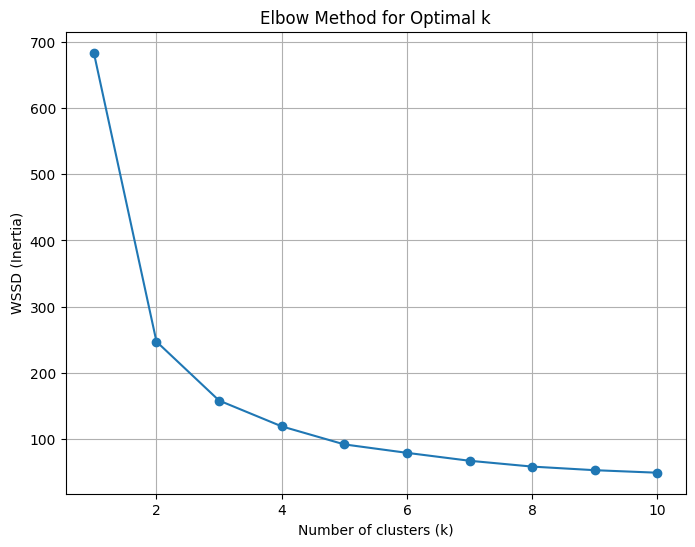

In [29]:
# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(penguin_clust_ks['k'], penguin_clust_ks['wssd'], marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSSD (Inertia)")
plt.grid(True)
plt.show()

In [31]:
penguin_clust_ks = []  # Use a list to store the results
for k in range(1, 11):
    elbow_kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    clusters = elbow_kmeans.fit(standardized_penguins)
    penguin_clust_ks.append({'k': k, 'wssd': clusters.inertia_})  # Append as a dictionary
# Convert the list to a DataFrame
penguin_clust_ks = pd.DataFrame(penguin_clust_ks)